In [20]:
import numpy as np 
import math
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
'''
*****************************************************************************
1.- Aerodinamic calculations for a wind turbine
*****************************************************************************

Author: Emilio Balocchi

'''


'\n*****************************************************************************\n1.- Aerodinamic calculations for a wind turbine\n*****************************************************************************\n\nAuthor: Emilio Balocchi\n\n'

In [3]:
'''Specifications'''
V_inf = 8 # m/s wind velocity
ro = 1.225 # kg/m^3

In [ ]:
'''
Question 1.
The wind speed after the wake expansion
is measured to be  4m/s. What is the axial induction factor a?

'''

In [17]:
''' a = f (Vw,  V_inf) '''
Vw = 4
a = ( V_inf - Vw ) / (2 * V_inf)
print('a = ', a)



a =  0.25


In [ ]:
''' a = f (Vd,  V_inf) '''
#a = ( V_inf - Vd ) / V_inf
#print('a = ', a)

In [95]:
''' 
Question 2
What would the flow velocity through the rotor at optimal induction?
'''
# for optimal induction, a = 1/3
a = 1/3
Vd = V_inf * ( 1 - a)
print('Vd = ',Vd)



Vd =  5.333333333333334


In [96]:
'''2.- radial induction factor'''

#a_quot = (1 - 3 * a) / ( 4 * a - 1 )
#a_quot

'2.- radial induction factor'

Text(0, 0.5, 'MW')

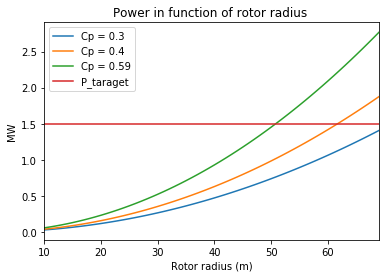

In [97]:
'''
Question 3
What rotor radius should the turbine have to produce  
1.5 MWatt the given inflow speed?'''

r = list(np.arange(10,70,1))
A = list(map(lambda x: math.pi * x**2, r))
Cp = [0.3, 0.4, 0.59] # using Cp max
P = []
col = []
for c in Cp:
    P.append(list(map(lambda x: (1/2 * ro * x * V_inf**3 * c)/1000000, A)))  # power in in MW
    col.append('Cp = '+str(c))

df_P = pd.DataFrame.from_records(P).T
df_P.columns = col
df_P['radius'] = r
df_P['P_taraget'] = 1.5
df_P.set_index('radius', inplace=True)
df_P.plot()
plt.title("Power in function of rotor radius ")
plt.xlabel("Rotor radius (m)")
plt.ylabel("MW")

In [98]:
'''lets choose a rotor radius of 50 m then the area is:'''
Ad = math.pi * 50**2
Ad

7853.981633974483

In [99]:
'''Cp equation'''
Cp = 4*a*(1-a)**2
Cp

0.5925925925925927

In [102]:
'''
Question 4
Assume now a rotor diameter of  d=116m. What is the thrust force on the rotor in kN?
'''
#The the thrust on the rotor
# T = 2 * ro * Ad * V_inf**2 * a *(1 - a) in N
Ad = math.pi * 116**2 / 4

T = ( 2 * ro * Ad * V_inf**2 * a *(1 - a) ) / 1000
T

368.2471585046238